In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import mnist

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [11]:
x_train.shape

(60000, 28, 28)

In [12]:
from tensorflow.keras import layers

In [27]:
model = Sequential([
    
    Flatten(input_shape=(28, 28)),
   
    Dense(128, activation='relu'),  
    
    Dense(64, activation='relu'),
    
    Dense(10, activation='softmax') 
])

c:\Users\kaila\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [28]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [30]:

history = model.fit(x_train, y_train, epochs=10, validation_split=0.2, batch_size=64,callbacks=[early_stopping], verbose=0)


In [32]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9588 - loss: 0.1715
Test Accuracy: 0.9631999731063843


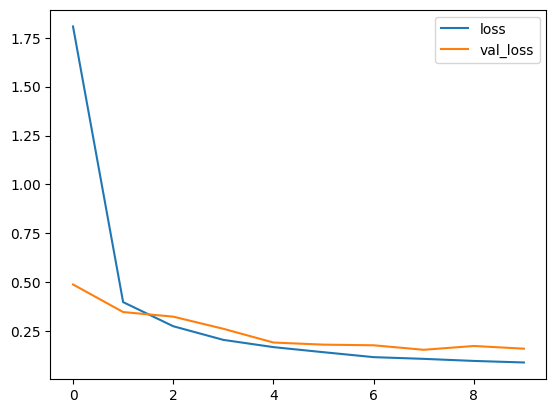

In [31]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();

In [29]:
from tensorflow.keras import layers, callbacks
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, 
    patience=20, 
    restore_best_weights=True,
)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


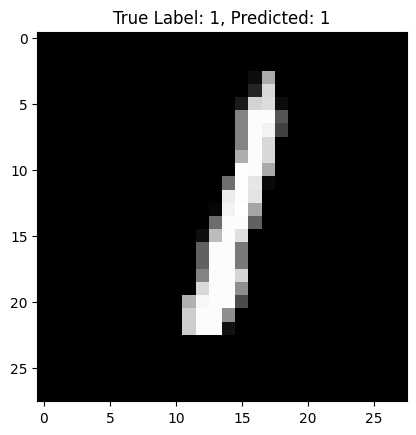

In [36]:
import matplotlib.pyplot as plt
import numpy as np

# Function to test a random image from the test set
def test_classification_model(model, x_test, y_test):
    # Choose a random index
    index = np.random.randint(0, x_test.shape[0])
    
 
    image = x_test[index]
    true_label = y_test[index]
  
    prediction = np.argmax(model.predict(image.reshape(1, 28, 28)))
    
    # Display the image
    plt.imshow(image, cmap='gray')
    plt.title(f"True Label: {true_label}, Predicted: {prediction}")
    plt.show()

# Call the function to test the model
test_classification_model(model, x_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


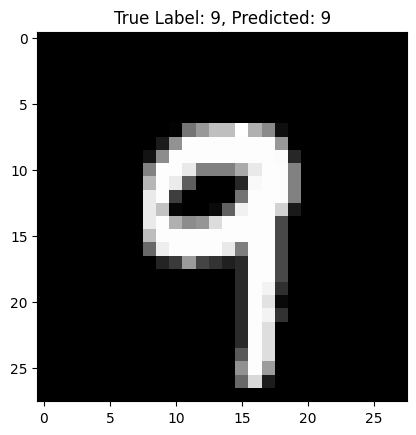

In [35]:
import matplotlib.pyplot as plt
import numpy as np

# Function to test a random image from the test set
def test_classification_model(model, x_test, y_test):
    # Choose a random index
    index = np.random.randint(0, x_test.shape[0])
    
    # Get the corresponding image and label
    image = x_test[index]
    true_label = y_test[index]  # Convert one-hot to class
    
    # Predict using the trained model
    prediction = np.argmax(model.predict(image.reshape(1, 28, 28)))
    
    # Display the image
    plt.imshow(image, cmap='gray')
    plt.title(f"True Label: {true_label}, Predicted: {prediction}")
    plt.show()

# Call the function to test the model
test_classification_model(model, x_test, y_test)